# Regression Models

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
from sklearn.linear_model import Ridge
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [14]:
#importing  dataset 

demographics = pandas.read_csv(r"C:\Users\Arjun\Documents\msc\thesis\dataset\demographics.csv")
CHQ_zscore = pandas.read_csv(r"C:\Users\Arjun\Documents\msc\thesis\dataset\CHQ_trajectory_lengths.csv")
SHQ_zscore =pandas.read_csv(r"C:\Users\Arjun\Documents\msc\thesis\dataset\SHQ_trajectory_lengths.csv")
entropy=pandas.read_csv(r"C:\Users\Arjun\Documents\msc\thesis\dataset\HomeAddressEntropy.csv")

## 1)Predicting CHQ from previous levels

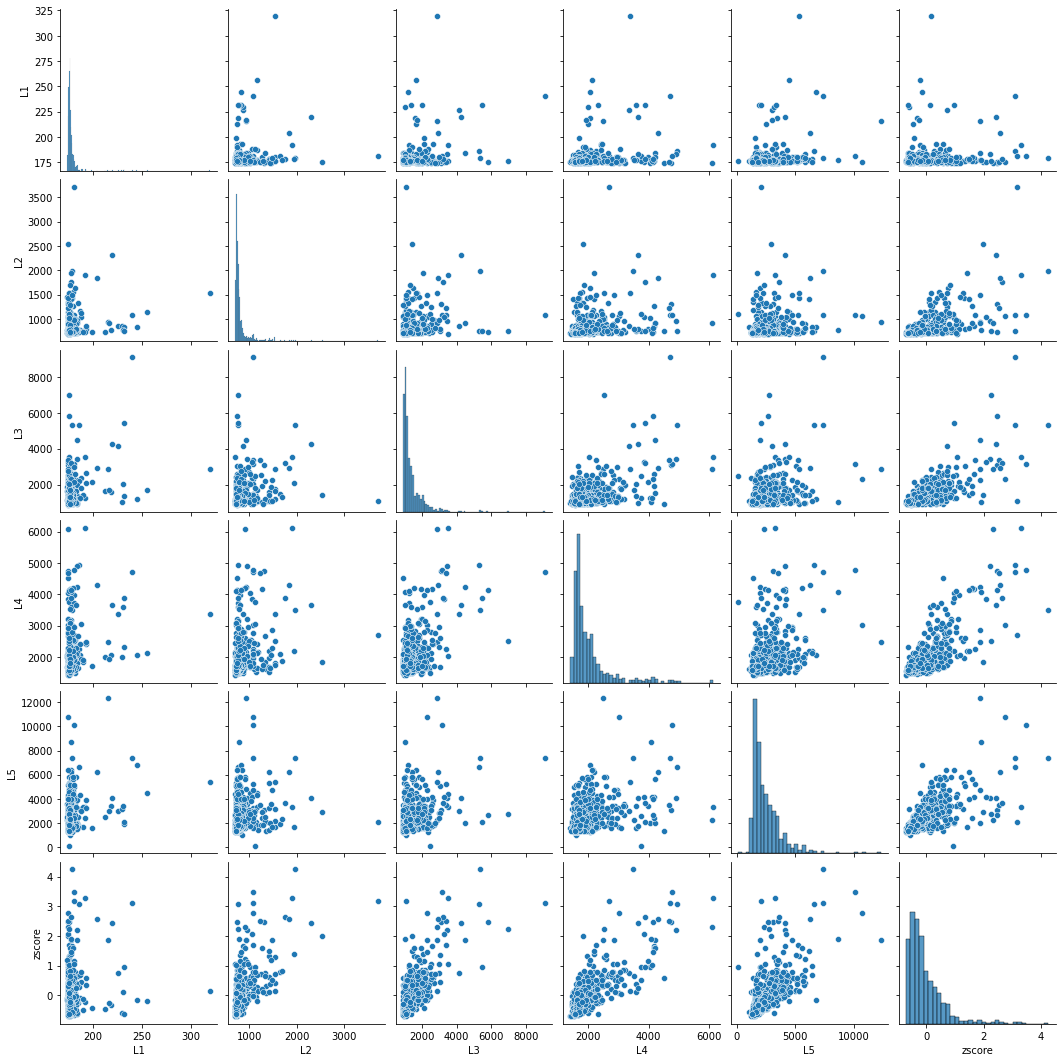

In [15]:
#chq_stat=CHQ_zscore.copy()
chq_feat=CHQ_zscore[["L2","L3","L4","L5"]]
chq_tar=CHQ_zscore[["zscore"]]
sns.pairplot(CHQ_zscore[["L1","L2","L3","L4","L5","zscore"]])

In [16]:
## Getting statistical insights for the variables 

chq_stat=CHQ_zscore.copy()
chq_feat=CHQ_zscore[["L1","L2","L3","L4","L5"]]

chq_tar=CHQ_zscore[["zscore"]]

mod=smf.ols(formula='zscore~  L1+L2 + L3 + L4 + L5', data=chq_stat)

res1 = mod.fit()

print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                 zscore   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.226e+04
Date:                Thu, 18 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:48:49   Log-Likelihood:                 942.29
No. Observations:                 599   AIC:                            -1873.
Df Residuals:                     593   BIC:                            -1846.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2606      0.038      6.855      0.0

In [17]:
#Multivariate regression 

x3_train, x3_test, y3_train, y3_test = train_test_split(chq_feat, chq_tar, test_size=0.33)


regrr_l1 = linear_model.LinearRegression()
regrr_l1.fit(x3_train, y3_train)
score_l1 = regrr_l1.score(x3_test, y3_test)
y_pred_l1 = regrr_l1.predict(x3_test)
print("mean absolute error",metrics.mean_absolute_error(y3_test, y_pred_l1))
print("mean squared error",metrics.mean_squared_error(y3_test, y_pred_l1))
print("root mean squared error",np.sqrt(metrics.mean_squared_error(y3_test, y_pred_l1)))
r2 = r2_score(y3_test, y_pred_l1)
print('r2 ', r2)

mean absolute error 0.02384702285316862
mean squared error 0.001970465503122619
root mean squared error 0.04438992569404255
r2  0.9946744459138859


In [18]:
##Lasso Regression 

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x3_train, y3_train)
y_pred_lasso = model_lasso.predict(x3_test)

print("mean absolute error",metrics.mean_absolute_error(y3_test, y_pred_lasso))
print("mean squared error",metrics.mean_squared_error(y3_test, y_pred_lasso))
print("root mean squared error",np.sqrt(metrics.mean_squared_error(y3_test, y_pred_lasso)))

r2_lasso = r2_score(y3_test, y_pred_lasso)
print('r2 ', r2_lasso)
row=[[714.2466037,1263.349755,2094.252622,1831.970022]]


mean absolute error 0.06548583292320825
mean squared error 0.03337996366263166
root mean squared error 0.18270184362132655
r2  0.9097843623264865


In [19]:
##Ridge regression 

ridgereg = Ridge(alpha=0.1)
ridgereg.fit(x3_train, y3_train)
y_pred_rid = ridgereg.predict(x3_test)
    
print("mean absolute error",metrics.mean_absolute_error(y3_test, y_pred_rid))
print("mean squared error",metrics.mean_squared_error(y3_test, y_pred_rid))
print("root mean squared error",np.sqrt(metrics.mean_squared_error(y3_test, y_pred_rid)))

r2 = r2_score(y3_test, y_pred_rid)
print('r2 ', r2)
row=[[714.2466037,1263.349755,2094.252622,1831.970022]]


mean absolute error 0.023846965727089248
mean squared error 0.0019704374791854736
root mean squared error 0.04438961003642039
r2  0.9946745216538533


### Finding the alpha values for lasso and  regression 

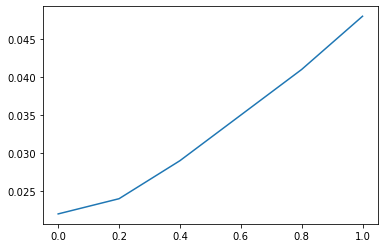

In [20]:
## Finding optimal alpha for Lasso
alpha_Lasso=[0,0.2,0.4,0.6,0.8,1]

MAE_Lasso=[0.022,0.024,0.029,0.035,0.041,0.048]

##These values were obtained after running the model for diffrent alphas

plt.plot(alpha_Lasso, MAE_Lasso)
plt.show()

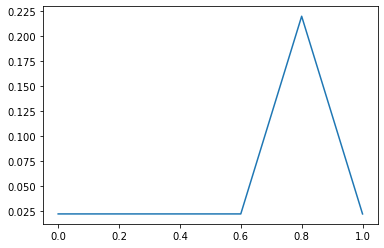

In [21]:
## Finding optimal alpha for Ridge
alpha_Ridge=[0,0.2,0.4,0.6,0.8,1]

MAE_Ridge=[0.022,0.022,0.022,0.022,0.22,0.022]

##These values were obtained after running the model for diffrent alphas

plt.plot(alpha_Ridge, MAE_Ridge)
plt.show()

## 2)Classification models (other experiments conducted)

### Classifying shq score into 2 categories good and fair
age,education,environment,gender -> shq category 
using naive bayes,desicion tree,random forest

Distribution of Sea hero Quest scores:

[[<AxesSubplot:title={'center':'zscore'}>]]
Distribution of  hero Quest scores:

[[<AxesSubplot:title={'center':'zscore'}>]]


<ipython-input-22-72746ebec9cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['gender'] = df_features['gender'].map(d)
<ipython-input-22-72746ebec9cb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['education'] = df_features['education'].map(d)
<ipython-input-22-72746ebec9cb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

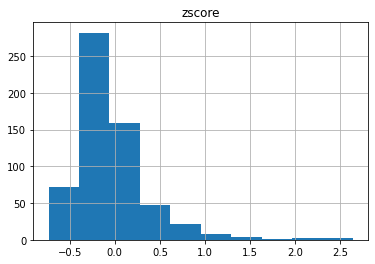

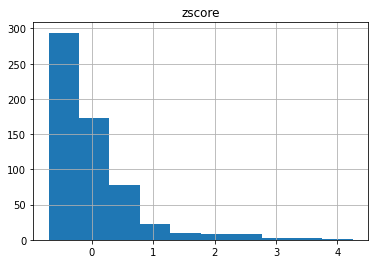

In [22]:
##data preprocessing for classification 


#Pre processing

#getting and preparing feature data
df_features=demographics[["age", "gender","education","environment"]]
d = {'Male': 1, 'Female': 2}
df_features['gender'] = df_features['gender'].map(d)
d = {'Tertiary': 1, 'Secondary': 0}
df_features['education'] = df_features['education'].map(d)
d={'City':1,"Suburbs":2,'Rural':3,"Mix":4}
df_features['environment'] = df_features['environment'].map(d)

##Getting target values

#df_target=SHQ_zscore[["zscore"]]

df_target=SHQ_zscore[SHQ_zscore.zscore <= 0.8]
df_target=df_target[["zscore"]]

df_target["class"]=""

##converting scores to classes

df_target.loc[(df_target['zscore'] <1) & (df_target['zscore'] >0 ) , 'class'] = 'category 1'
df_target.loc[(df_target['zscore'] <0) & (df_target['zscore'] >-1 ) , 'class'] = 'category 2'


d={'category 1':1,"category 2":2}
df_target['class'] = df_target['class'].map(d)

df_tar=df_target[["class"]]

print("Distribution of Sea hero Quest scores:\n")
print(SHQ_zscore.hist(column="zscore"))
print("Distribution of  hero Quest scores:\n")
print(CHQ_zscore.hist(column='zscore'))


Distribution of Sea hero Quest scores:top

Distribution of city hero Quest scores:bottom



array([[<AxesSubplot:title={'center':'zscore'}>]], dtype=object)

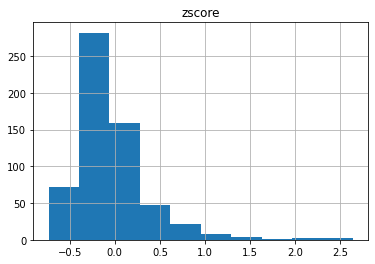

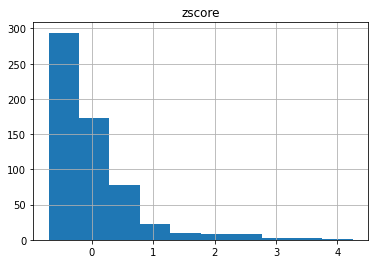

In [23]:
print("Distribution of Sea hero Quest scores:top\n")
SHQ_zscore.hist(column="zscore")
print("Distribution of city hero Quest scores:bottom\n")
CHQ_zscore.hist(column='zscore')


In [24]:

df_features=demographics[["age", "gender","education","environment"]]
d = {'Male': 1, 'Female': 2}
df_features['gender'] = df_features['gender'].map(d)
d = {'Tertiary': 1, 'Secondary': 0}
df_features['education'] = df_features['education'].map(d)
d={'City':1,"Suburbs":2,'Rural':3,"Mix":4}
df_features['environment'] = df_features['environment'].map(d)



#converting zscore to performances 
df_target=SHQ_zscore[["zscore"]]
e=df_target.index[(df_target["zscore"] >1) & (df_target["zscore"] <3)]
g=df_target.index[(df_target["zscore"] >0) & (df_target["zscore"] <1)]
f=df_target.index[(df_target["zscore"] >-1) & (df_target["zscore"] <0)]

df_target["class"]=""

##converting scores to classes

df_target.loc[(df_target['zscore'] <1) & (df_target['zscore'] >0 ) , 'class'] = 'good'
df_target.loc[(df_target['zscore'] <0) & (df_target['zscore'] >-1 ) , 'class'] = 'fair'

d={"good":1,'fair':2}
df_target['class'] = df_target['class'].map(d)

df_data1=pandas.concat([df_features, df_target], axis=1, join='inner')

df_data1
df_data2=df_data1[df_data1.zscore <= 0.8]
df_feature=df_data2[['age','education','gender','environment']]
df_tarr=df_data2[['class']]


<ipython-input-24-4ce0bc9e6352>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['gender'] = df_features['gender'].map(d)
<ipython-input-24-4ce0bc9e6352>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['education'] = df_features['education'].map(d)
<ipython-input-24-4ce0bc9e6352>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [25]:
## Decision Tree

features = ['age', 'gender', 'education', 'environment']

x2_train, x2_test, y2_train, y2_test = train_test_split(df_feature, df_tarr, test_size=0.3, random_state=1)
#print(x2_train,x2_test,y2_train,y2_test)

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x2_train,y2_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(x2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y_pred_dt))
print("Precision:",metrics.precision_score(y2_test, y_pred_dt))
print("Recall:",metrics.recall_score(y2_test, y_pred_dt))

Accuracy: 0.6802325581395349
Precision: 0.391304347826087
Recall: 0.4


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

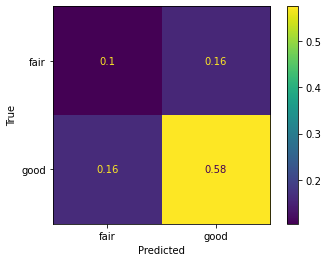

In [26]:
cm = confusion_matrix(y2_test, y_pred_dt, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['fair',"good"])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [27]:
## Random Forest 

#Create a Gaussian Classifier
clf_r=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_r.fit(x2_train,y2_train)

y_pred_rf=clf_r.predict(x2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y_pred_rf))
print("Precision:",metrics.precision_score(y2_test, y_pred_rf))
print("Recall:",metrics.recall_score(y2_test, y_pred_rf))

<ipython-input-27-ccc5d59a2b16>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_r.fit(x2_train,y2_train)


Accuracy: 0.7209302325581395
Precision: 0.4482758620689655
Recall: 0.28888888888888886


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

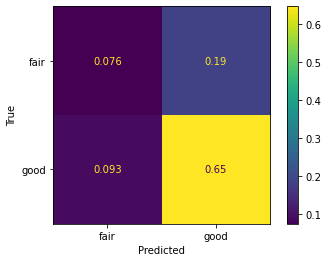

In [28]:
cm = confusion_matrix(y2_test, y_pred_rf, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['fair',"good"])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [29]:
## Navie bayes 

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x2_train, y2_train)

#Predict the response for test dataset
y_pred_nb = gnb.predict(x2_test)
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred_nb))
print("Precision:",metrics.precision_score(y2_test, y_pred_nb))
print("Recall:",metrics.recall_score(y2_test, y_pred_nb))

Accuracy: 0.7441860465116279
Precision: 0.5294117647058824
Recall: 0.2


C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

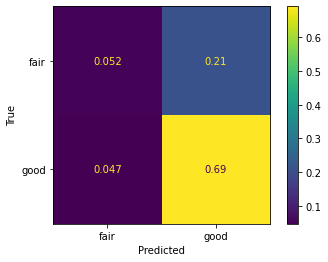

In [30]:
cm = confusion_matrix(y2_test, y_pred_nb, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['fair',"good"])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')